<a href="https://colab.research.google.com/github/kamabdi/gem_of_data_science/blob/main/Gem_of_data_science_TODO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is classification?
Basic task in Computer Vision

## Training: 
![alt text](https://cdn-images-1.medium.com/max/1600/1*oB3S5yHHhvougJkPXuc8og.gif)


# Why it is difficult?!

1.   Semantic Gap - Did machines see the same way we do? Nope
2.   Illumination
3.   View point
4.   Deformation
5.   Occlusion
6.   Background Clutter
7.   Intraclass variation



# Now how we can implement that?
#### What you'll learn

1. What is a neural network and how to train it
2. How to build 1-layer FC neural network using PyTorch
3. How to add more layers
4. How to pick hyperparams for your model
5. How to build convolutional networks and train them

How about overfitting, dropout, learning rate decay? 


# Pytorch in Colab 
Pytorch is an awesome Deep Learning Framework from Facebook [link text](http://pytorch.org) \\
Colab - Google actually gives you a free GPU for a limited time (12 hours) and you can run your code in Jupyter Notebook in the brower ))) \\
Isn't that GREAAAAT ?


# Import all necessary packages

In [ ]:
import PIL.Image as image
import numpy as np
import matplotlib.pyplot as plt

# import PyTorch packages
import torch
import torch.nn as nn
import torchvision.models as model
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim


In [ ]:
!nvidia-smi

Sat Nov  6 06:10:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Load data
For this experiments we will be using MNIST dataset

In [ ]:
root = './data'
batch_size = 64
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
# The output of torchvision datasets are images with values in range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]

'''#To load data you need 3 componets 
1. Dataset
2. Data Preprocessing 
3. Dataloader
'''

# Data Preprocessing 
transform = transforms.Compose([
                       # The output of torchvision datasets are images with values in range [0, 1].
                       # We transform them to Tensors with values in range [-1, 1]
                       transforms.ToTensor(), 
                       transforms.Normalize((0.1307,), (0.3081,))]) # for better learning we need to substract mean and devide by std
                      # can add more data preprocessing techniques: scaling, crop, randomly change the brightness, contrast, saturation and hue of an image, etc...
# Create dataset  
train_dataset = datasets.MNIST(root, train=True, download=True, transform=transform)

# Dataloader 
train_loader = torch.utils.data.DataLoader(train_dataset,  batch_size=batch_size, shuffle=True, **kwargs)

# TODO 
# Write transform, dataset and dataloader for test data


# Look at your data

torch.Size([1, 28, 28])


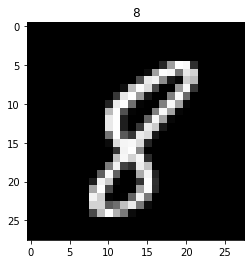

In [ ]:
def imshow(inp, name, title=None):
    import pylab
    """Imshow for Tensor."""
    #inp = inp.numpy().transpose((1, 2, 0))
    inp = inp.squeeze().numpy()
    mean = np.array([0.1307])
    std = np.array([0.3081])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp,  cmap=pylab.gray())
    result = image.fromarray((inp * 255).astype(np.uint8))
  #  result.save(name)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    
for batch_idx, (data, target) in enumerate(train_loader):
  id = 1 # id image from the data batch 
  sample = data[id] # change number to any id in the batch (0, batch_size-1)
  print(sample.shape) # size of the images 
  imshow(sample, 'sample', target[id].numpy())
  break
  

# Create a model for training
New model class is defined as a new nn.Module

## FC

Let's start with a simple Fully Connected Network

![alt text](https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/img/e218e6eee9da4e.png)

In [ ]:
# Create 1-layer FC model
class Simple_FC(nn.Module):
    def __init__(self, input_size=784, num_classes=10):
        super(Simple_FC, self).__init__()
        self.fc1 = nn.Linear(input_size, num_classes)  
    
    def forward(self, x):
        x = x.view(-1, 784)
        out = self.fc1(x) # weighted sum of input and network weights -> Wx+b, b - bias
        return out # return logits - activations before softmax layer 

![alt text](https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/img/fba0638cc213a29.png)

In [ ]:
# Create model with 5 layers 
class Deep_FC(nn.Module):
    def __init__(self, input_size=784, num_classes=10):
        super(Deep_FC, self).__init__()
        # TODO 
        # create 5 layer network 
    
    def forward(self, x):
        x = x.view(-1, 784)
        # TODO
        # write how 5 layer network processes the input data 
        
        return x

## CNN
Now let's see how we get even more from the network with a better architecture (CNN) 

![alt text](https://cdn-images-1.medium.com/max/1600/1*oB3S5yHHhvougJkPXuc8og.gif)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.bn1 = nn.BatchNorm2d(10)
        self.bn2 = nn.BatchNorm2d(20)
        self.bn3 = nn.BatchNorm1d(50)

        self.activation = nn.ReLU()

        # TODO 
        # write 2 fully connected layers 

        # TODO 2
        # change activation function to Sigmoid and train model 
      

    def forward(self, x):

        x = self.activation(F.max_pool2d(self.bn1(self.conv1(x)), 2))
        x = self.activation(F.max_pool2d(self.bn2(self.conv2(x)), 2))

        x = x.view(-1, 16*20)
        
        # TODO 
        # write how FC layers process output of convolutional layers
        
        
        return x

## Pick model for testing

In [ ]:
model = Simple_FC()
# model = Deep_FC()
# model = CNN()
model = model.to(device)

# Define a Loss Function(Criterion) and an Optimizer


In [ ]:
lr = 0.01 
momentum = 0.9
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

In [ ]:
log_interval = 100
def train(epoch):
    for batch_idx, (data, target) in enumerate(train_loader):
        # move data to GPU for faster computation
        data, target = data.to(device), target.to(device)
        # remove previous computations from Optimizer
        optimizer.zero_grad() 
        # get predictions from the model
        output = model(data) 
        # compute error
        loss = criterion(output, target)
        # calculate how much each layer should be modified
        loss.backward() 
        # update model parameters
        optimizer.step() 
            
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.00f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))
            
            # Compute accuracy
            _, argmax = torch.max(output, 1)
            accuracy = (target == argmax.squeeze()).float().mean()

# Check the model accuracy 

In [ ]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        # TODO 
        # move data to GPU for faster computation
        
        # TODO 
        # get predictions from the model
       
        # compute accumulative error over all test samples 
        test_loss += criterion(output, target).data.item()
        # get predictions
        pred = output.data.max(1)[1] 
        # count how many images were correctly classified
        correct += pred.eq(target.data).cpu().sum()

    test_loss = test_loss
    test_loss /= len(test_loader) # loss function already averages over batch size
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

# Let's Finally Train your Created Model

In [ ]:
epochs = 1
for epoch in range(1, epochs + 1):
    train(epoch)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.316117
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.509516
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.306459
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.319104
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.199463
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.355488
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.157422
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.256930
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.522515
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.424172


In [ ]:
test()


Test set: Average loss: 0.3030, Accuracy: 9159/10000 (91.59%)



## But real life is not perfect. So your real function will probably look like that. Still  good 
![alt text](https://cdn-images-1.medium.com/max/1200/1*msObu3xbQzSnKvtCW2z6YQ.png)